# Predicting Polish demography (total population, year by year), using fertility rate, imigration data and historic population change.
First off, required imports:


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import re
import json


# Data to process
First of all, population over the years.
We will take this from World Development Indicators, as they have very recent data, just from 2024-03-28.



In [4]:


df = pd.read_csv('Countries_population.csv')

polish_population_df = df[df['Country Name'] == 'Poland']
polish_population_df = polish_population_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_population_df.dropna(axis='columns',inplace=True)
polish_population_df.index=['Population']
polish_population_df=polish_population_df.T
polish_population_df


,Population
1960,29637450.0
1961,29964000.0
1962,30308500.0
1963,30712000.0
1964,31139450.0
...,...
2018,37974750.0
2019,37965475.0
2020,37899070.0
2021,37747124.0


Lets graph those values:

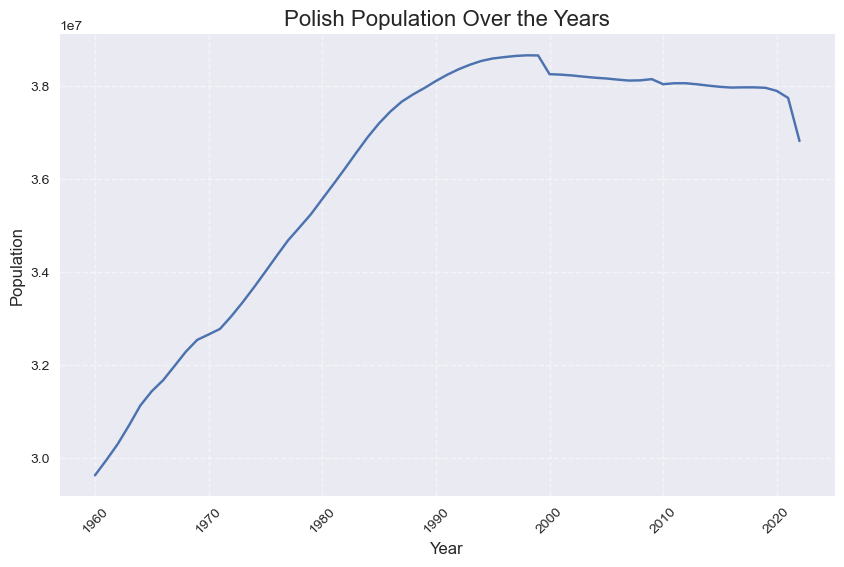

In [5]:


plt.style.use('seaborn-v0_8')

ax = polish_population_df.plot(figsize=(10, 6), legend=False)

ax.set_title('Polish Population Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_population_over_the_years.png')


# International Migrant Stock
Again now, we will use World Bank data. This time, however, a problem arises - data is only colected every 5 years or so, and thus we must interpolate. I have decided to use linear interpolation from pandas.

In [6]:
df = pd.read_csv('Countries_migrant_stock.csv')

polish_migrant_stock = df[df['Country Name'] == 'Poland']
polish_migrant_stock = polish_migrant_stock.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_migrant_stock.index=['International Migrant Stock']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_migrant_stock.interpolate(method='linear', axis=1, inplace=True)
polish_population_df.dropna(axis='index',inplace=True)
polish_migrant_stock=polish_migrant_stock.T
polish_migrant_stock.drop(polish_migrant_stock.tail(2).index,inplace=True)
polish_migrant_stock

,International Migrant Stock
1960,2424881.0
1961,2389838.4
1962,2354795.8
1963,2319753.2
1964,2284710.6
...,...
2018,619403.0
2019,619403.0
2020,619403.0
2021,619403.0


Here is how it looks on a graph:

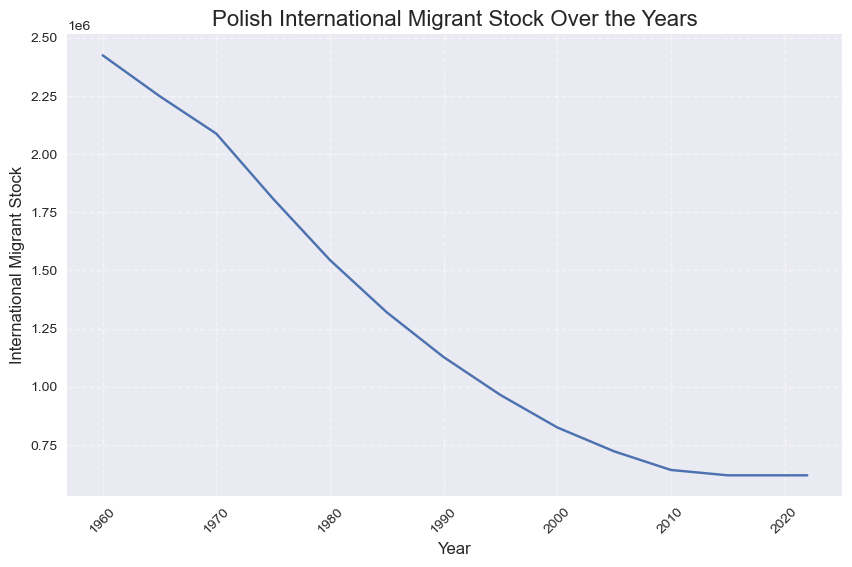

In [7]:


plt.style.use('seaborn-v0_8')

ax = polish_migrant_stock.plot(figsize=(10, 6), legend=False)

ax.set_title('Polish International Migrant Stock Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('International Migrant Stock', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_int_migrant_stock_over_the_years.png')


# Fertility rate per woman
Once again, courtesy of World Bank we can find the most important statistic for population change - fertility rate.

In [8]:
df = pd.read_csv('Countries_fertility_rate.csv')

polish_fertility_rate = df[df['Country Name'] == 'Poland']
polish_fertility_rate = polish_fertility_rate.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_fertility_rate.index=['Fertility Rate']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_fertility_rate.interpolate(method='linear', axis=1, inplace=True)
polish_fertility_rate.dropna(axis='index',inplace=True)
polish_fertility_rate=polish_fertility_rate.T
polish_fertility_rate.drop(polish_fertility_rate.tail(2).index,inplace=True)
polish_fertility_rate

,Fertility Rate
1960,2.98
1961,2.83
1962,2.72
1963,2.70
1964,2.57
...,...
2018,1.46
2019,1.44
2020,1.39
2021,1.33


Now for the graph:

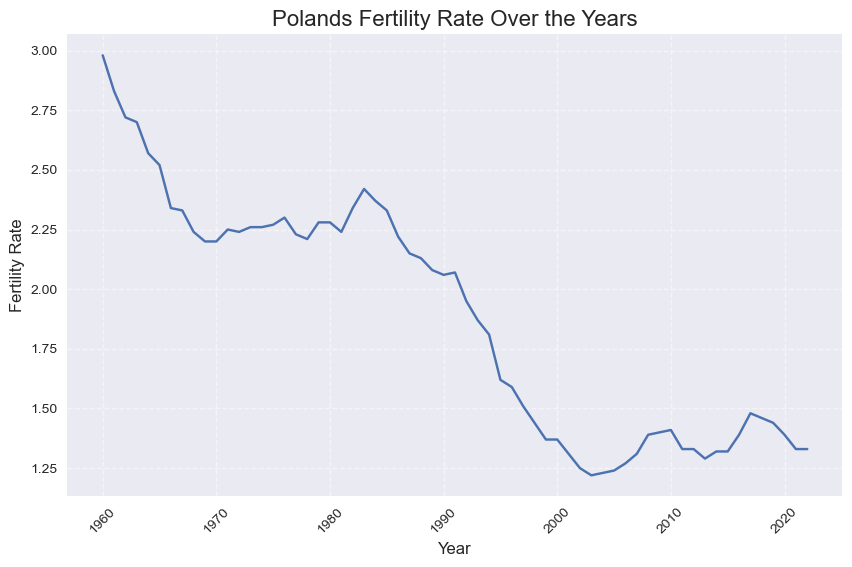

In [9]:


plt.style.use('seaborn-v0_8')

ax = polish_fertility_rate.plot(figsize=(10, 6), legend=False)

ax.set_title('Polands Fertility Rate Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Fertility Rate', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_fertility_rate.png')


# Life expentancy at birth
Now for our last metric, life expentancy, at birth, once again sourced from WB:

In [10]:
df = pd.read_csv('Countries_life_expentancy_ab.csv')

polish_life_expentancy = df[df['Country Name'] == 'Poland']
polish_life_expentancy = polish_life_expentancy.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_life_expentancy.index=['Life Expentancy at Birth']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_life_expentancy.interpolate(method='linear', axis=1, inplace=True)
polish_life_expentancy.dropna(axis='index',inplace=True)
polish_life_expentancy=polish_life_expentancy.T
polish_life_expentancy.drop(polish_life_expentancy.tail(2).index,inplace=True)
polish_life_expentancy.columns

Index(['Life Expentancy at Birth'], dtype='object')

Plotting time:

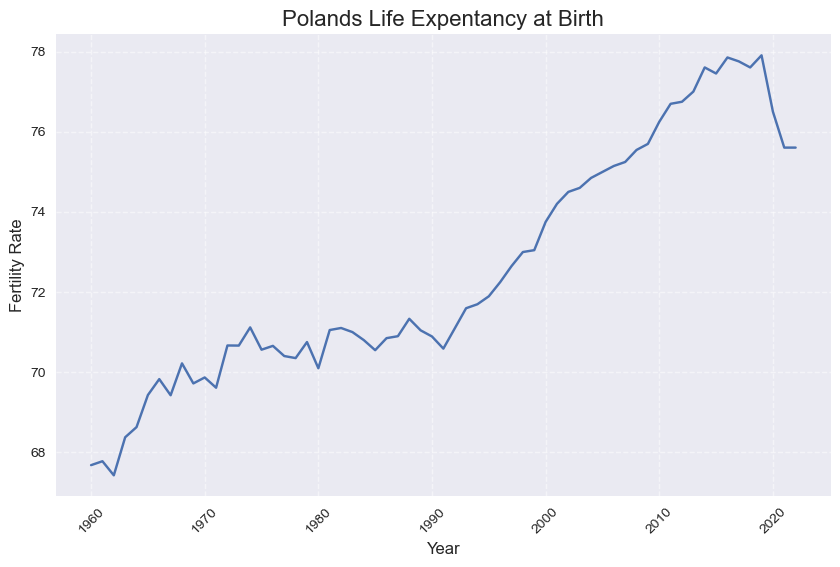

In [11]:
plt.style.use('seaborn-v0_8')

ax = polish_life_expentancy.plot(figsize=(10, 6), legend=False)

ax.set_title('Polands Life Expentancy at Birth', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Fertility Rate', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_life_expentancy.png')

# Urbanization level of Poland
During the research, finding the urbanization level was exceedingly hard. I found the best source at last at [Zintegrowana Platforma Edukacyjna Ministerstwa Edukacji Narodowej](https://zpe.gov.pl/a/zroznicowanie-poziomu-urbanizacji-w-polsce/D19MUchJD), but the only acceptable data was presented in a way of an image.  
I have decided to use [scrape](scrape_image.py) it, and the proceed to use [WebPlot Digitizer](https://automeris.io/WebPlotDigitizer.html) in order to turn it into analyzable form of .csv file.  
It would soon become clear that WebPlot Digitizer did a correct, but not flawless job of turning the image into a file.<br> Instead of treating years as the distinc values that they are, it created them in the form of continouus values.<br>It was nothing a quick python script could not fix however, named [python_fitter](python_fitter.py) with function modify_file that truncates real part of years and unifies them.<br>
Now, it must be noted that data only goes up all the way to 2012 - considering those were just a few years I have decided to enter them manually to the file.

In [12]:
from python_fitter import modify_file
from scrape_image import download_image
#Image sraping
download_image("https://static.zpe.gov.pl/portal/f/res-minimized/R1DRpEwOu0kly/4/fYPhB0sYKSWe5DLdlULEQRUZjaP4NGsL.png","urbanizacjawPolsce.png")
#Csv modification, image -> csv was done externally
modify_file("urbanization_analyzed")

Downloaded image successfully - urbanizacjawPolsce.png
Downloaded image successfully - urbanizacjawPolsce.png


In [25]:
df = pd.read_csv('urbanization_analyzed_modified.csv')
df.reset_index(drop=True, inplace=True)
polish_urbanization = df
polish_urbanization=polish_urbanization.drop(polish_urbanization.index[:14])
polish_urbanization.set_index('Year', inplace=True)
polish_urbanization.index.name = None
polish_urbanization.index = polish_urbanization.index.astype(str)
polish_urbanization.index = polish_urbanization.index.astype(object)
polish_urbanization


,Urbanization
1960,47.668335
1961,47.899164
1962,48.063771
1963,48.246360
1964,48.386846
...,...
2018,58.897383
2019,58.693046
2020,58.488708
2021,58.284371


# Here is the plot:

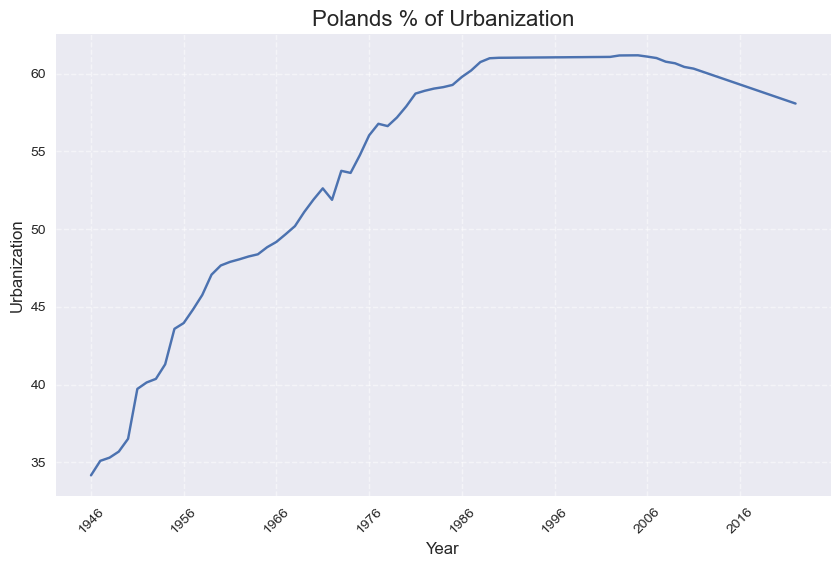

In [14]:
plt.style.use('seaborn-v0_8')

ax = polish_urbanization.plot(figsize=(10, 6), legend=False)

ax.set_title(r'Polands % of Urbanization', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Urbanization', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_urbanization.png')

# Lets combine our data into shared Data Frame:

In [61]:
final_data=pd.concat([polish_population_df,polish_migrant_stock,polish_fertility_rate,polish_life_expentancy, polish_urbanization],axis=1)
final_data.reset_index(level=0, inplace=True)
final_data.rename(columns={'index': 'Year'}, inplace=True)
final_data.style.hide(axis="index")
final_data

,Year,Population,International Migrant Stock,Fertility Rate,Life Expentancy at Birth,Urbanization
0,1960,29637450.0,2424881.0,2.98,67.680488,47.668335
1,1961,29964000.0,2389838.4,2.83,67.778049,47.899164
2,1962,30308500.0,2354795.8,2.72,67.426829,48.063771
3,1963,30712000.0,2319753.2,2.70,68.375610,48.246360
4,1964,31139450.0,2284710.6,2.57,68.629268,48.386846
...,...,...,...,...,...,...
58,2018,37974750.0,619403.0,1.46,77.602439,58.897383
59,2019,37965475.0,619403.0,1.44,77.904878,58.693046
60,2020,37899070.0,619403.0,1.39,76.500000,58.488708
61,2021,37747124.0,619403.0,1.33,75.602439,58.284371


# At last we can begin analysing our data:

Raport for presented data:

In [ ]:
raport = ProfileReport(final_data, title="Profiling Report")
raport.to_file("final_profiling_report.html")

[As we can see on the report](final_profiling_report.html) there is a very high correlation of our data, which bodes well for our analysis. 
# However a challange arises.
Data frame contains non-normalized values - in one index population values can be as high as 3800000, but fertility rate as low as 1.2. This can, however, be solved using scaler from sckit-learn.
Lets graph it all for better visualisation:

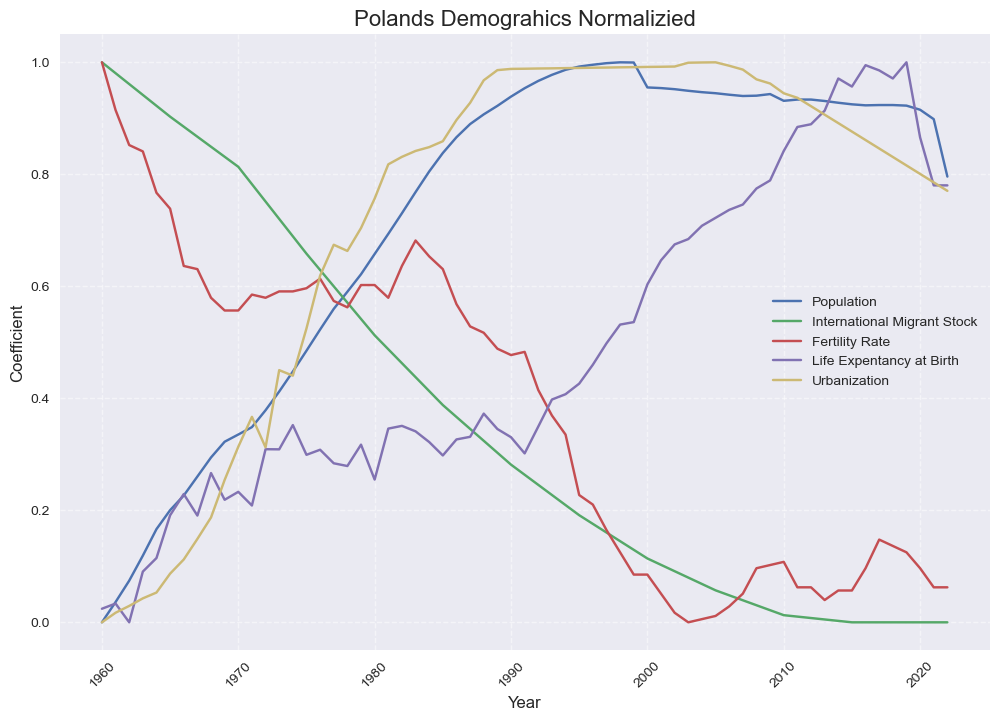

In [40]:
plt.style.use('seaborn-v0_8')
# Data scaling - othgerwise the data would be hard to read!
scaler= MinMaxScaler()
final_data_scaled = pd.DataFrame(scaler.fit_transform(final_data), columns=final_data.columns, index=final_data.index)
ax = final_data_scaled.plot(figsize=(12, 8), legend=True)

ax.set_title('Polands Demograhics Normalizied', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Coefficient', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('poliand_demographics_statistics.png')

# Data anomaly 
It does not take an eagle sight to notice a slight data anomaly towards 2019 - it is likely to be caused by COVID-19 pandemic.<br>
For scientific purposes lets drop the data from 2019 onwards.

In [43]:
final_data = final_data.drop(final_data.index[-3:])

Index(['Population', 'International Migrant Stock', 'Fertility Rate',
       'Life Expentancy at Birth', 'Urbanization'],
      dtype='object')

# Time to get to work!
With data now ready, its time to test diffrent models, and see how they are doing

Model: Linear Regression
Prediction: [37350129.37572093 37619327.01419526 30488113.85308437 38476607.1583103
 31117197.37120768 38298187.29330251 34681159.6627261  32693276.46584782
 36980428.65816825 37393549.06288986 37823952.38128857 32094069.44591105
 38416789.58485927]
Mean Squared Error: 161123877952.83643
R-squared: 0.9820348937243247



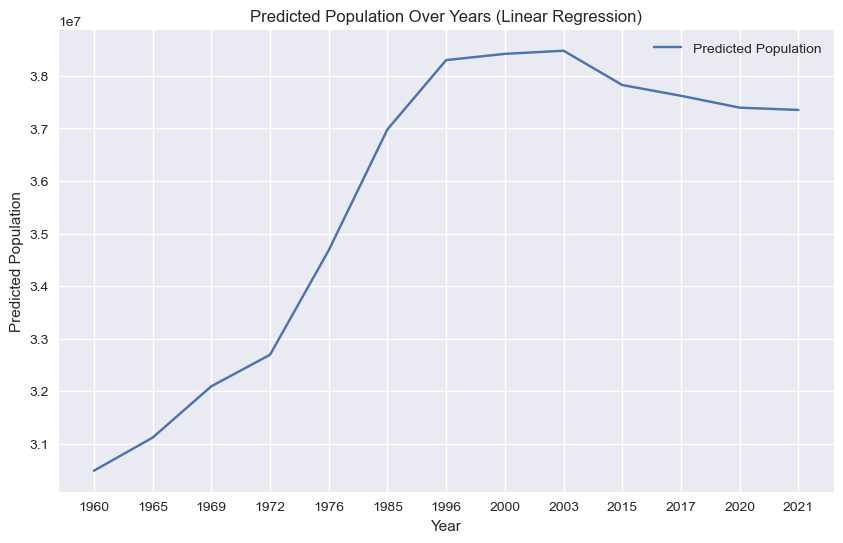

Model: Ridge Regression
Prediction: [37348690.28509884 37604609.78192398 30480282.98996174 38494704.43555015
 31122847.22399457 38309028.704686   34672377.57385314 32699281.64743958
 36964610.28388122 37386203.47514358 37820354.43869661 32106731.56382528
 38432388.87713034]
Mean Squared Error: 160963871908.94278
R-squared: 0.9820527341935328



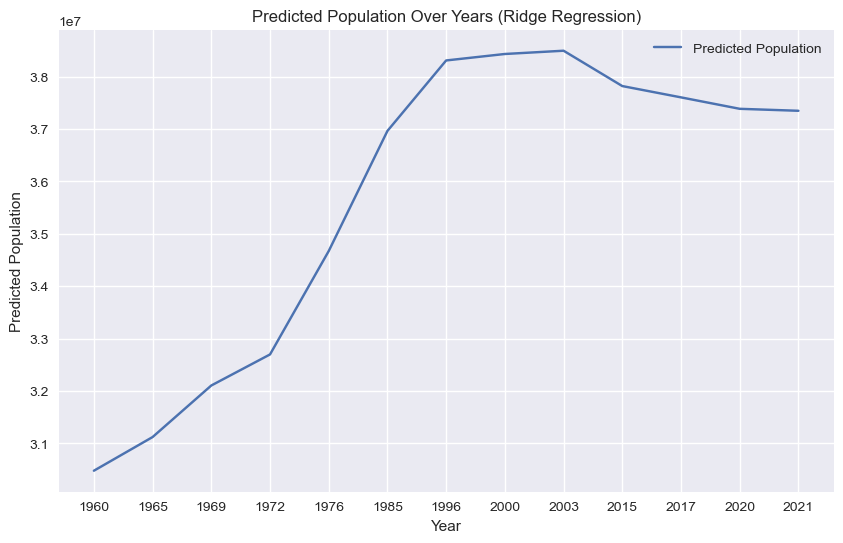

Model: Lasso Regression
Prediction: [37353034.38240073 37619429.84245645 30486860.05847597 38476396.17260775
 31116213.64043388 38298057.46761242 34681962.40922147 32693047.74786581
 36979899.43140629 37395517.3674488  37823912.2818655  32095090.32288194
 38416259.65978909]
Mean Squared Error: 160659944086.43066
R-squared: 0.9820866217569464



c:\Users\krzys\miniconda3\envs\msid\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.319e+12, tolerance: 3.459e+10
  model = cd_fast.enet_coordinate_descent(


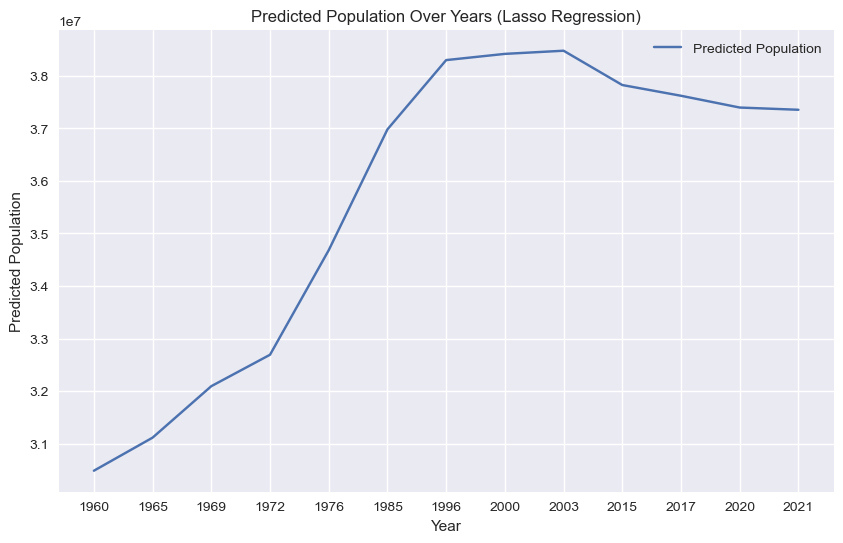

Model: Decision Tree Regression
Prediction: [36821749. 37965475. 29964000. 38230364. 31987155. 38594998. 34015199.
 32783500. 37456119. 37974750. 38011735. 32664300. 38660271.]
Mean Squared Error: 130365153501.61539
R-squared: 0.9854644521528536



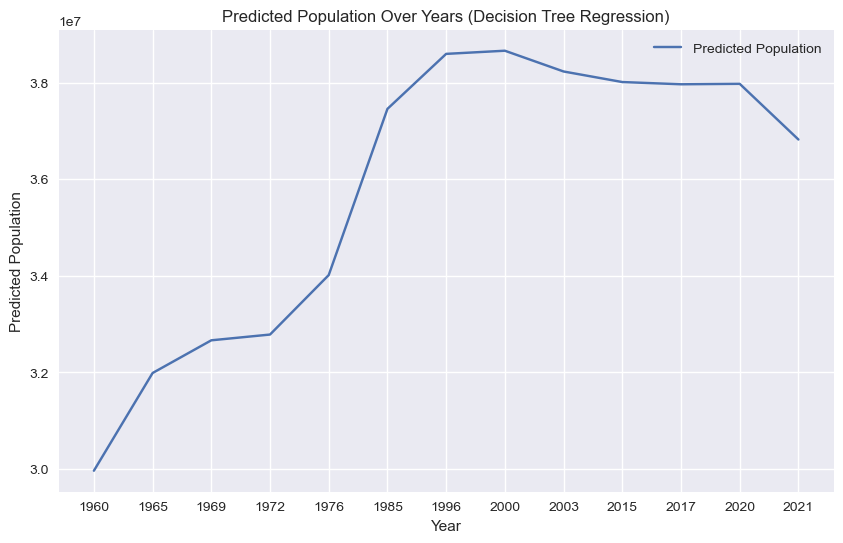

Model: Random Forest Regression
Prediction: [37107088.63 37820431.09 30235741.5  38198957.97 31486063.2  38612565.54
 34533120.05 33137770.31 36895559.04 37568412.67 37999398.13 32484924.09
 38419980.35]
Mean Squared Error: 81899635397.28603
R-squared: 0.99086829542247



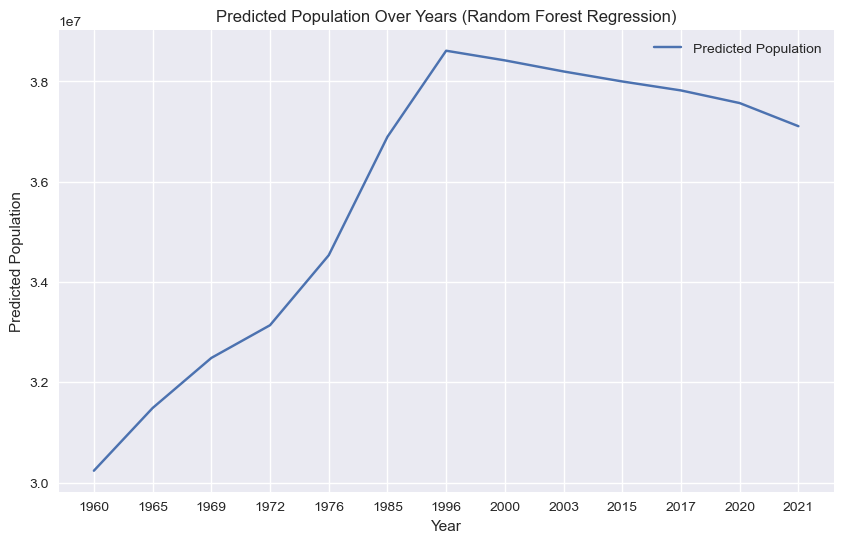

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X=final_data.drop(columns='Population')
y=final_data['Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}
for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Prediction: {y_pred}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("")
    df_pred = X_test.copy()
    df_pred['Predicted Population'] = y_pred
    df_pred['Actual Population'] = y_test
    
    # Sort the DataFrame by year
    df_pred = df_pred.sort_values('Year')
    
    # Plot the predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(df_pred['Year'], df_pred['Predicted Population'], label='Predicted Population')
    plt.plot(df_pred['Year'], df_pred['Actual Population'], label='Actual Population', linestyle='dashed')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Predicted vs Actual Population Over Years ({name})')
    plt.legend()
    plt.show()
